In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import MiniBatchKMeans, KMeans
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import metrics
from sklearn.cluster import MiniBatchKMeans, KMeans
import matplotlib.cm as cm
import lda

In [2]:
df = pd.read_pickle('my_df.pickle')

In [3]:
tweet_texts_processed = [str.join(" ", x) for x in df['p1']] # list of pre-processed tweet texts

vectorizer = TfidfVectorizer(min_df=4, max_features = 10000)
vz = vectorizer.fit_transform(tweet_texts_processed)

In [4]:
from sklearn.feature_extraction.text import CountVectorizer

cvectorizer = CountVectorizer(min_df=4, max_features=10000, stop_words='english')
cvz = cvectorizer.fit_transform(tweet_texts_processed)

In [5]:
n_topics = 15
n_iter = 2000
lda_model = lda.LDA(n_topics=n_topics, n_iter=n_iter)
X_topics = lda_model.fit_transform(cvz)

tsne_lda = TSNE(n_components=2, random_state=0).fit_transform(X_topics[:10000])

INFO:lda:n_documents: 99
INFO:lda:vocab_size: 19
INFO:lda:n_words: 275
INFO:lda:n_topics: 15
INFO:lda:n_iter: 2000
INFO:lda:<0> log likelihood: -1816
INFO:lda:<10> log likelihood: -1097
INFO:lda:<20> log likelihood: -1049
INFO:lda:<30> log likelihood: -1047
INFO:lda:<40> log likelihood: -1053
INFO:lda:<50> log likelihood: -1027
INFO:lda:<60> log likelihood: -1020
INFO:lda:<70> log likelihood: -1034
INFO:lda:<80> log likelihood: -1049
INFO:lda:<90> log likelihood: -1047
INFO:lda:<100> log likelihood: -1039
INFO:lda:<110> log likelihood: -1042
INFO:lda:<120> log likelihood: -1029
INFO:lda:<130> log likelihood: -1038
INFO:lda:<140> log likelihood: -1057
INFO:lda:<150> log likelihood: -1025
INFO:lda:<160> log likelihood: -1051
INFO:lda:<170> log likelihood: -1038
INFO:lda:<180> log likelihood: -1047
INFO:lda:<190> log likelihood: -1034
INFO:lda:<200> log likelihood: -1028
INFO:lda:<210> log likelihood: -1073
INFO:lda:<220> log likelihood: -1062
INFO:lda:<230> log likelihood: -1041
INFO:lda

In [6]:
doc_topic = lda_model.doc_topic_
lda_keys = []
for i, tweet in enumerate(tweet_texts_processed):
    lda_keys += [doc_topic[i].argmax()]

In [7]:
import matplotlib.pyplot as plt

plt.scatter(x=tsne_lda[:,0], y=tsne_lda[:,1], c=lda_keys)


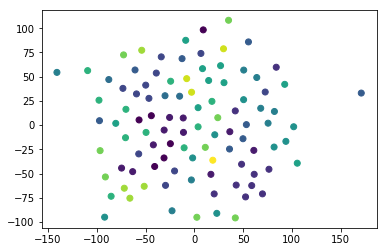

In [8]:
plt.show()